In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

In [ ]:
#Creamos el dataset a utilizar para los analisis:
df = pd.read_csv('/content/sample_data/Tarea 3.csv')
df.head()

,property_type,price,city,province_name,location,baths,purpose,bedrooms,area
0,Flat,10000000,Islamabad,Islamabad Capital,G-10,2,For Sale,2,101.17
1,Flat,6900000,Islamabad,Islamabad Capital,E-11,3,For Sale,3,141.64
2,House,16500000,Islamabad,Islamabad Capital,G-15,6,For Sale,5,202.34
3,House,43500000,Islamabad,Islamabad Capital,Bani Gala,4,For Sale,4,1011.71
4,House,7000000,Islamabad,Islamabad Capital,DHA Defence,3,For Sale,3,202.34


In [ ]:
#Variables a considerar
features = ['bedrooms','baths']
nbeds = [2, 3]
nbaths = [2, 3]
blockvars = ['property_type','city','purpose']
ndf = df[['bedrooms','baths','property_type','city','purpose','price','area']]

#CIUDAD = Lahore

#Filtros correspondientes
ndf = ndf[(((ndf['city'] == 'Lahore') & (ndf['property_type'] == 'House')) & (ndf['purpose'] == 'For Sale')) & ((ndf['area'] > 100) & (ndf['area'] < 110) )]
#Incluimos los niveles
ndf = ndf[(ndf['bedrooms'].isin(nbeds)) & (ndf['baths'].isin(nbaths))].reset_index()
ndf = ndf.drop(columns = 'index')
ndf = ndf[['bedrooms','baths','price']]
ndf = ndf.infer_objects()
ndf

,bedrooms,baths,price
0,3,3,10000000
1,3,2,6550000
2,3,3,6000000
3,3,3,9500000
4,3,3,4000000
...,...,...,...
552,2,2,7000000
553,3,3,5500000
554,2,2,4500000
555,2,2,6200000


In [ ]:
#Cantidad de tratamientos
gby = ndf.groupby(['bedrooms','baths']).count()
nreps = 14
gby

price
bedrooms baths       
2        2         93
         3         14
3        2         34
         3        416

In [ ]:
from pandas.core.internals import concat

#Dataset con las replicas
dfx = pd.DataFrame(columns = ['bedrooms','baths','price'])
for n in nbeds:
  for m in nbaths:
      dfn = ndf[(ndf['bedrooms'] == n) & (ndf['baths'] == m)].sample(nreps)
      dfx = pd.concat([dfx, dfn], ignore_index= True)
dfx = dfx.infer_objects()
dfx

In [ ]:
print(f"media:\t {dfx['price'].mean()}")
print(f"std: \t {round(dfx['price'].std(),2)}")
print(f"maximo:\t {dfx['price'].max()}")
print(f"minimo:\t {dfx['price'].min()}")

media:	 6552232.142857143
std: 	 3871070.67
maximo:	 29000000
minimo:	 600000


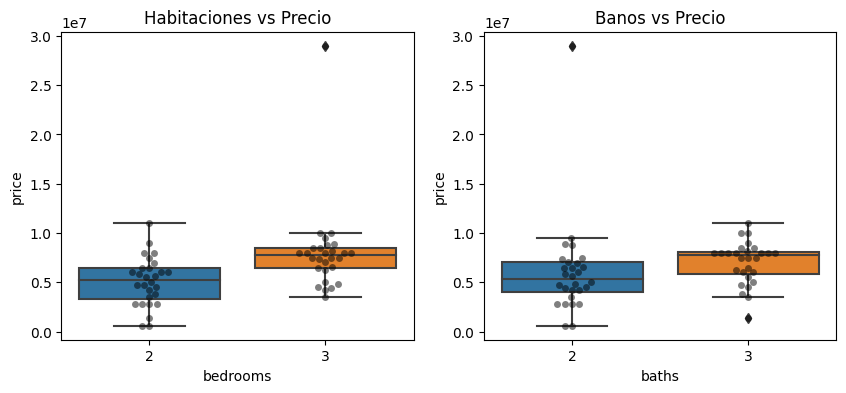

In [ ]:
#outliers
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].set_title('Habitaciones vs Precio')
sns.boxplot(x="bedrooms", y="price", data=dfx, ax=axs[0])
sns.swarmplot(x="bedrooms", y="price", data=dfx, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('Banos vs Precio')
sns.boxplot(x="baths", y="price", data=dfx, ax=axs[1])
sns.swarmplot(x="baths", y="price", data=dfx, color='black',
              alpha = 0.5, ax=axs[1]);

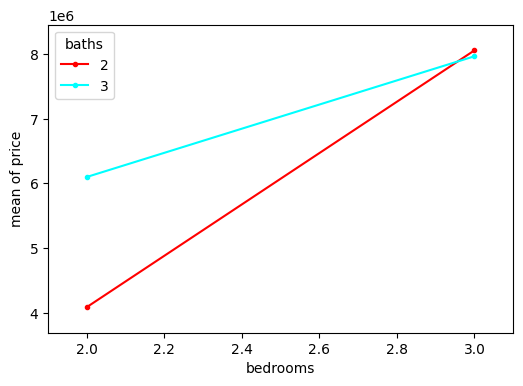

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = dfx.bedrooms,
    trace    = dfx.baths,
    response = dfx.price,
    ax       = ax,
)

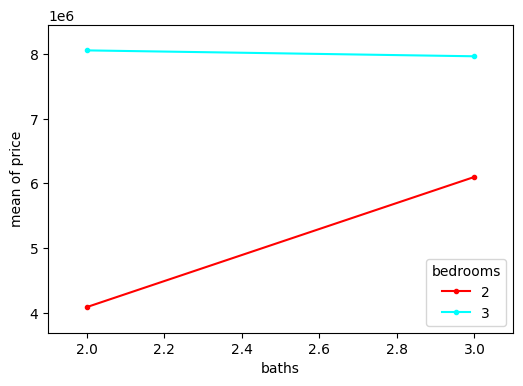

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = dfx.baths,
    trace    = dfx.bedrooms,
    response = dfx.price,
    ax       = ax,
)

In [ ]:
#test anova
!pip install pingouin
import pingouin as pg

In [ ]:
pg.anova(
    data     = dfx,
    dv       = 'price',
    between  = ['baths', 'bedrooms'],
    detailed = True
).round(4)

,Source,SS,DF,MS,F,p-unc,np2
0,baths,1.289760e+13,1,1.289760e+13,0.9909,0.3241,0.0187
1,bedrooms,1.189757e+14,1,1.189757e+14,9.1405,0.0039,0.1495
2,baths * bedrooms,1.546126e+13,1,1.546126e+13,1.1878,0.2808,0.0223
3,Residual,6.768508e+14,52,1.301636e+13,NaN,NaN,NaN
